In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from PIL import Image, ImageDraw, ImageFont

In [2]:
path2img='./IDRID/Images/'
path2labels='./IDRID/Labels/'

# EDA

In [31]:
labels_list=os.listdir(os.path.join(path2labels,'train'))

In [32]:
for excel in labels_list:
    print(pd.read_csv(os.path.join(path2labels,'train',excel)).iloc[0:413,0:3])

    Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_001                  3                       2
1    IDRiD_002                  3                       2
2    IDRiD_003                  2                       2
3    IDRiD_004                  3                       2
4    IDRiD_005                  4                       0
..         ...                ...                     ...
408  IDRiD_409                  2                       1
409  IDRiD_410                  2                       0
410  IDRiD_411                  2                       0
411  IDRiD_412                  2                       0
412  IDRiD_413                  2                       0

[413 rows x 3 columns]
      Image No  X- Coordinate  Y - Coordinate
0    IDRiD_001         1494.0          1970.0
1    IDRiD_002         2270.0          1329.0
2    IDRiD_003         2109.0          1351.0
3    IDRiD_004         2679.0          1453.0
4    IDRiD_005         2244.0          1404.0
..  

In [39]:
data=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Disease Grading_Training Labels.csv')).iloc[0:413,0:3]
tmp=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Fovea_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp.columns=["X Fovea Center","Y Fovea Center"]
data=data.join(tmp)
tmp=pd.read_csv(os.path.join(path2labels,'train','IDRiD_OD_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp.columns=["X OD Center","Y OD Center"]
data=data.join(tmp)

In [70]:
data.to_csv(os.path.join(path2labels,'train/labels.csv'))
data

,Image name,Retinopathy grade,Risk of macular edema,X Fovea Center,Y Fovea Center,X OD Center,Y OD Center
0,IDRiD_001,3,2,1494.0,1970.0,2858.0,1805.0
1,IDRiD_002,3,2,2270.0,1329.0,943.0,1119.0
2,IDRiD_003,2,2,2109.0,1351.0,779.0,1269.0
3,IDRiD_004,3,2,2679.0,1453.0,1292.0,1284.0
4,IDRiD_005,4,0,2244.0,1404.0,1037.0,1198.0
...,...,...,...,...,...,...,...
408,IDRiD_409,2,1,1536.0,1614.0,2900.0,1516.0
409,IDRiD_410,2,0,1903.0,1606.0,3035.0,1554.0
410,IDRiD_411,2,0,2412.0,1584.0,1105.0,1318.0
411,IDRiD_412,2,0,1996.0,1917.0,3203.0,1711.0


./IDRID/Images/train/IDRiD_001.jpg 3 2
./IDRID/Images/train/IDRiD_002.jpg 3 2
./IDRID/Images/train/IDRiD_003.jpg 2 2
./IDRID/Images/train/IDRiD_004.jpg 3 2
./IDRID/Images/train/IDRiD_005.jpg 4 0
./IDRID/Images/train/IDRiD_006.jpg 4 1
./IDRID/Images/train/IDRiD_007.jpg 4 0
./IDRID/Images/train/IDRiD_008.jpg 4 2
./IDRID/Images/train/IDRiD_009.jpg 3 2


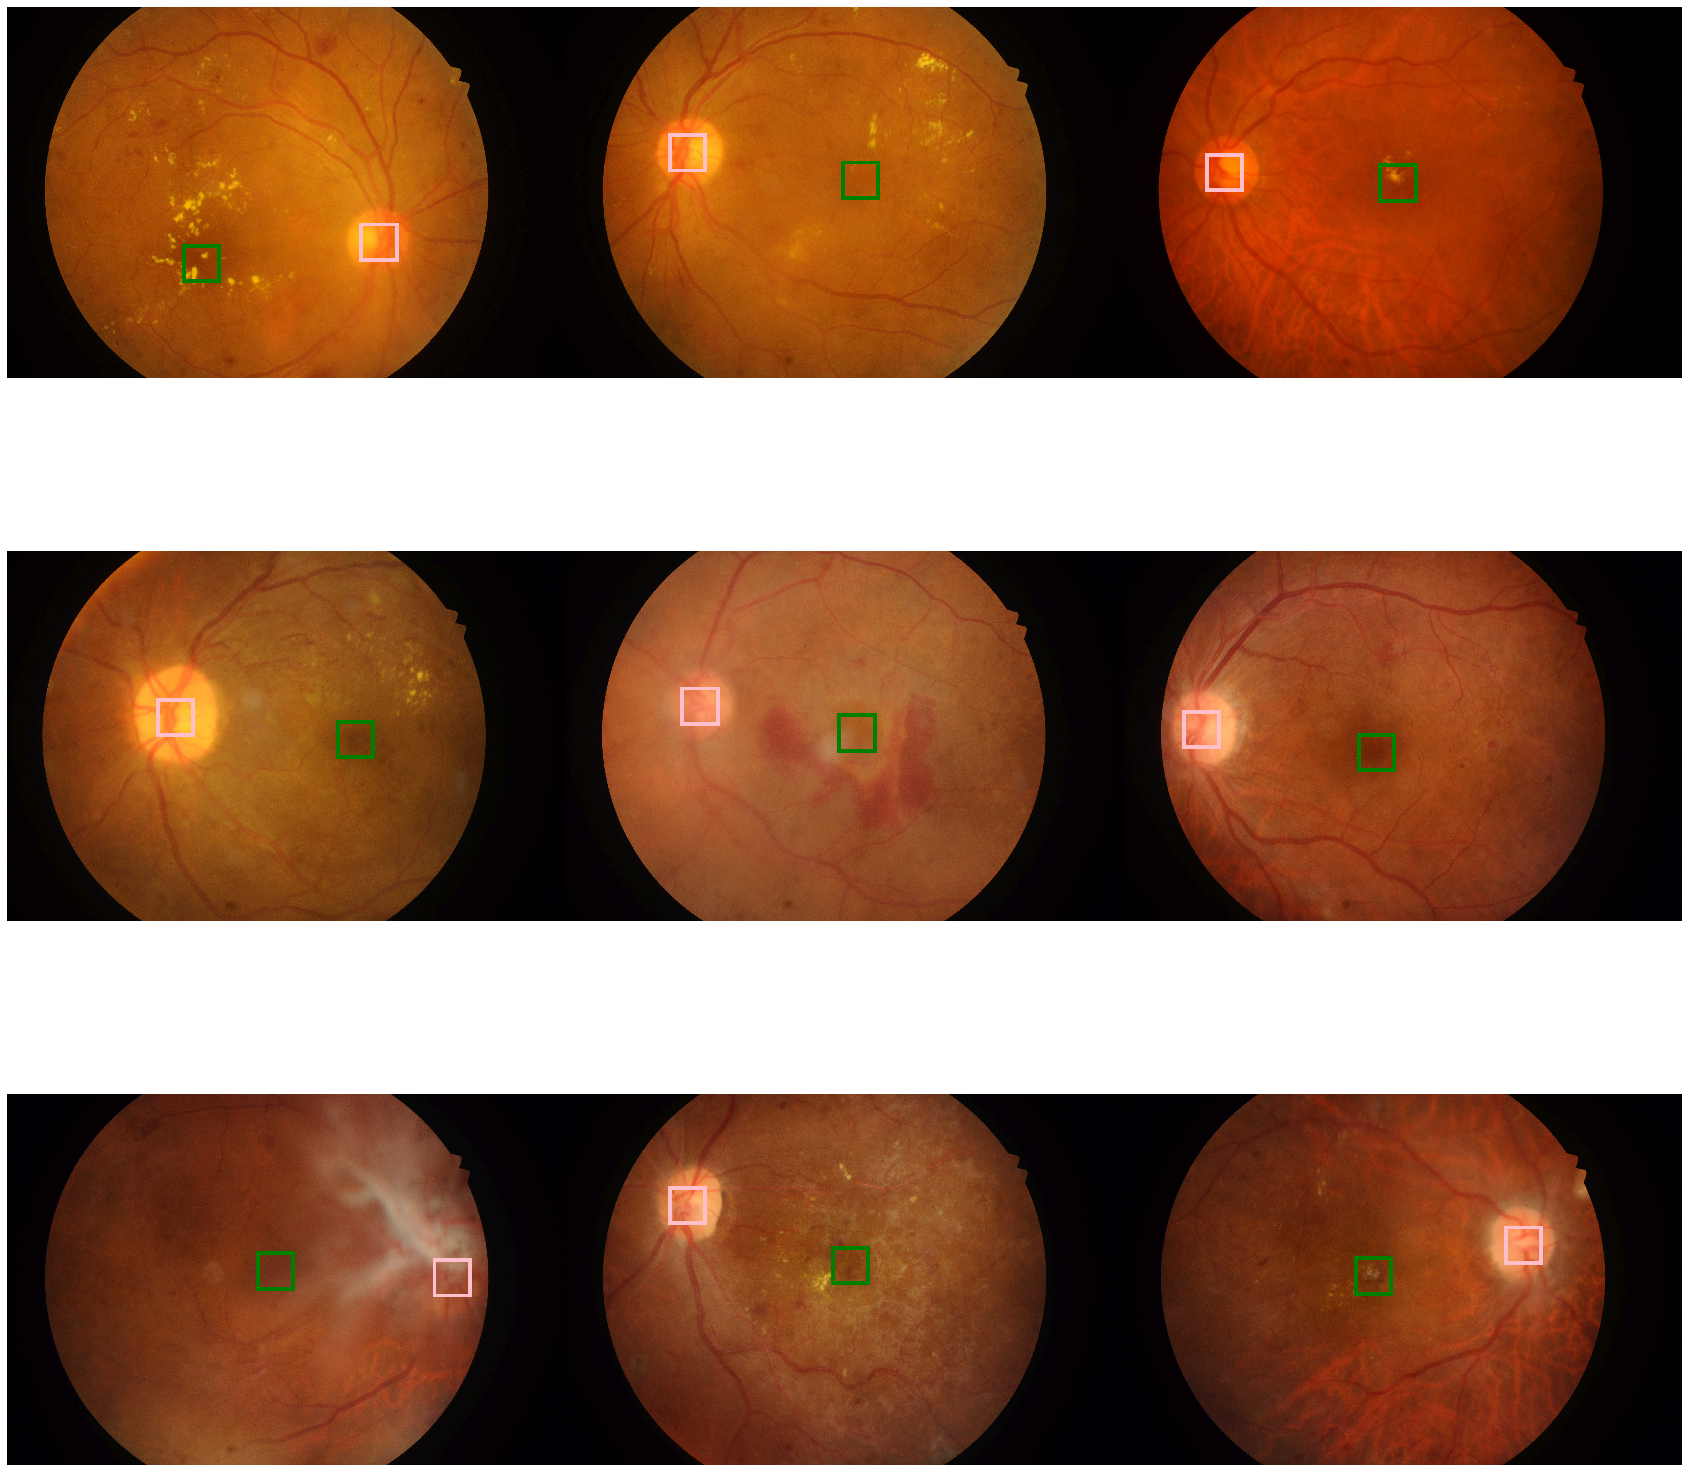

In [83]:
plt.rcParams['figure.figsize']=(30.0,30.0)
plt.subplots_adjust(wspace=0,hspace=0)
nrows,ncols=3,3
box=150
width=30
for i,j in enumerate(data.iloc[0:9,0]):
    full_filename=os.path.join(path2img,'train/',j+'.jpg')
    print(full_filename,data.iloc[i,1],data.iloc[i,2])
    img=Image.open(full_filename)
    draw=ImageDraw.Draw(img)
    draw.rectangle(((data.iloc[i,3]-box,data.iloc[i,4]-box),(data.iloc[i,3]+box,data.iloc[i,4]+box)),outline='green',width=width)
    draw.rectangle(((data.iloc[i,5]-box,data.iloc[i,6]-box),(data.iloc[i,5]+box,data.iloc[i,6]+box)),outline='pink',width=width)
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(np.array(img))
    plt.axis('off')

In [ ]:
data=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Disease Grading_Training Labels.csv')).iloc[0:413,0:3]
tmp=pd.read_csv(os.path.join(path2labels,'train','IDRiD_Fovea_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp.columns=["X Fovea Center","Y Fovea Center"]
data=data.join(tmp)
tmp=pd.read_csv(os.path.join(path2labels,'train','IDRiD_OD_Center_Training Set_Markups.csv')).iloc[0:413,1:3]
tmp.columns=["X OD Center","Y OD Center"]
data=data.join(tmp)